# Handling Missing Data 
 - fillna 

 - dropna 

 - interpolate


In [139]:
import pandas as pd
import numpy as np

In [142]:
df = pd.read_csv('/content/drive/MyDrive/Tinkerhub/Data Cleaning/weather_one.csv', parse_dates=['day'])
df.head()

,day,temparature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-02-04,NaN,9.0,sunny
2,2017-03-05,28.0,NaN,snow
3,2017-04-06,NaN,7.0,NaN
4,2017-05-07,32.0,NaN,Rain


In [143]:
type(df['day'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [144]:
df.set_index('day',inplace=True)
df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,NaN,9.0,sunny
2017-03-05,28.0,NaN,snow
2017-04-06,NaN,7.0,NaN
2017-05-07,32.0,NaN,Rain
2017-06-08,NaN,NaN,sunny
2017-07-09,NaN,NaN,NaN
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,NaN,NaN


In [104]:
new_df = df.fillna(0)
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,0.0,9.0,sunny
2017-03-05,28.0,0.0,snow
2017-04-06,0.0,7.0,0
2017-05-07,32.0,0.0,Rain
2017-06-08,0.0,0.0,sunny
2017-07-09,0.0,0.0,0
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,0.0,0


In [105]:
new_df = df.fillna( {'temparature': 0, 'windspeed': 0, 'event': 'no event'} )
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,0.0,9.0,sunny
2017-03-05,28.0,0.0,snow
2017-04-06,0.0,7.0,no event
2017-05-07,32.0,0.0,Rain
2017-06-08,0.0,0.0,sunny
2017-07-09,0.0,0.0,no event
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,0.0,no event


In [145]:
df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,NaN,9.0,sunny
2017-03-05,28.0,NaN,snow
2017-04-06,NaN,7.0,NaN
2017-05-07,32.0,NaN,Rain
2017-06-08,NaN,NaN,sunny
2017-07-09,NaN,NaN,NaN
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,NaN,NaN


In [106]:
new_df = df.fillna(method="ffill")
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,32.0,9.0,sunny
2017-03-05,28.0,9.0,snow
2017-04-06,28.0,7.0,snow
2017-05-07,32.0,7.0,Rain
2017-06-08,32.0,7.0,sunny
2017-07-09,32.0,7.0,sunny
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,8.0,cloudy


In [107]:
new_df = df.fillna(method="bfill")
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,28.0,9.0,sunny
2017-03-05,28.0,7.0,snow
2017-04-06,32.0,7.0,Rain
2017-05-07,32.0,8.0,Rain
2017-06-08,34.0,8.0,sunny
2017-07-09,34.0,8.0,cloudy
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,NaN,NaN


In [108]:
# axis is either "index" or "columns"

new_df = df.fillna(method="bfill", axis=1) 
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-02-04,9,9,sunny
2017-03-05,28,snow,snow
2017-04-06,7,7,NaN
2017-05-07,32,Rain,Rain
2017-06-08,sunny,sunny,sunny
2017-07-09,NaN,NaN,NaN
2017-08-10,34,8,cloudy
2017-09-11,40,NaN,NaN


In [109]:
new_df = df.fillna(method="ffill",limit=1)
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,32.0,9.0,sunny
2017-03-05,28.0,9.0,snow
2017-04-06,28.0,7.0,snow
2017-05-07,32.0,7.0,Rain
2017-06-08,32.0,NaN,sunny
2017-07-09,NaN,NaN,sunny
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,8.0,cloudy


#### Explore pandas.DataFrame.fillna [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html)

## **Interpolation** is the process of using known data values to estimate unknown data values

### There are many other methods for interpolation such as quadratic,  piecewise_polynomial, cubic etc... Just google "dataframe interpolate" to see complete documentation

In [110]:
new_df = df.interpolate()
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-02-04,30.000000,9.00,sunny
2017-03-05,28.000000,8.00,snow
2017-04-06,30.000000,7.00,NaN
2017-05-07,32.000000,7.25,Rain
2017-06-08,32.666667,7.50,sunny
2017-07-09,33.333333,7.75,NaN
2017-08-10,34.000000,8.00,cloudy
2017-09-11,40.000000,8.00,NaN


In [146]:
df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,NaN,9.0,sunny
2017-03-05,28.0,NaN,snow
2017-04-06,NaN,7.0,NaN
2017-05-07,32.0,NaN,Rain
2017-06-08,NaN,NaN,sunny
2017-07-09,NaN,NaN,NaN
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,NaN,NaN


see [pandas official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.interpolate.html) of pandas.DataFrame.interpolate

In [111]:
new_df = df.dropna()
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-08-10,34.0,8.0,cloudy


In [112]:
new_df = df.dropna(how='all')
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,NaN,9.0,sunny
2017-03-05,28.0,NaN,snow
2017-04-06,NaN,7.0,NaN
2017-05-07,32.0,NaN,Rain
2017-06-08,NaN,NaN,sunny
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,NaN,NaN


In [113]:
df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,NaN,9.0,sunny
2017-03-05,28.0,NaN,snow
2017-04-06,NaN,7.0,NaN
2017-05-07,32.0,NaN,Rain
2017-06-08,NaN,NaN,sunny
2017-07-09,NaN,NaN,NaN
2017-08-10,34.0,8.0,cloudy
2017-09-11,40.0,NaN,NaN


In [114]:
new_df = df.dropna(thresh=2)
new_df

,temparature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-02-04,NaN,9.0,sunny
2017-03-05,28.0,NaN,snow
2017-05-07,32.0,NaN,Rain
2017-08-10,34.0,8.0,cloudy


### Using `replace()` 

In [115]:
nums = {'Car Model Number': [223, np.nan, 237, 195, np.nan, 
                             575, 110, 313, np.nan, 190, 143,  
                             np.nan], 
       'Engine Number': [4511, np.nan, 7570, 1565, 1450, 3786,  
                         2995, 5345, 7777, 2323, 2785, 1120]} 

In [116]:
dff = pd.DataFrame(nums, columns =['Car Model Number', 'Engine Number'])
dff.head()

,Car Model Number,Engine Number
0,223.0,4511.0
1,NaN,NaN
2,237.0,7570.0
3,195.0,1565.0
4,NaN,1450.0


In [117]:
dff['Car Model Number'] = dff['Car Model Number'].replace(np.nan, 2)
dff.head()

,Car Model Number,Engine Number
0,223.0,4511.0
1,2.0,NaN
2,237.0,7570.0
3,195.0,1565.0
4,2.0,1450.0


### pandas.DataFrame.replace [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)

# Outlier Treatment

An **Extreme valu**e is just a minimum or a maximum, it need not be much different from the data & a point that is far a way from the other points called as **outlier**.

eg: Age of employees

Age = 21, 23, 24, 25, 26, 28, 30, 45

**Extreme value =30**


**Outlier =45**

![](https://miro.medium.com/max/426/1*cRKgIYxvTxbLVizP7P4tSg.png)

 - How can we Identify an outlier?

  1- Using Box plots

  2- Using Scatter plot

  3- Using Z score

  ![](https://media.geeksforgeeks.org/wp-content/uploads/20200406060534/91786235_543328226613873_148229268529217536_n.jpg)


 - There are Two Methods for Outlier Treatment

  1- Interquartile Range(IQR) Method

  2- Z Score method
  
  3- Replacing Outliers with Median Values



## Example 2

# Scatterplot

![](https://i.imgur.com/YOHfciv.png)

The above chart indicates that most of the data points are clustered in the lower half of the plot. The points located to the extreme right of the x-axis or the y-axis indicate **outliers**

# Boxplot

![](https://i.imgur.com/j63wJOM.png).

In [147]:
import pandas as pd

In [148]:
df = pd.read_csv("/content/drive/MyDrive/Tinkerhub/Data Cleaning/mtcars.csv")
df2 = df.copy()
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [150]:
df.shape

(32, 12)

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [121]:
df.shape

(32, 12)

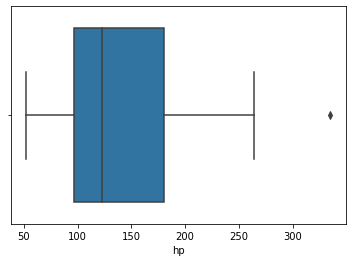

In [122]:
import seaborn as sns
sns.boxplot(data=df,x=df["hp"])

  ![](https://media.geeksforgeeks.org/wp-content/uploads/20200406060534/91786235_543328226613873_148229268529217536_n.jpg)

In [123]:
Q1=df["hp"].quantile(0.25)
Q3=df["hp"].quantile(0.75)

IQR = Q3-Q1

print("Q1 : ", Q1)
print("Q3 : ", Q3)
print("IQR : ", IQR)

Lower_Whisker = Q1 - 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

print("===============================")
print("Lower_Whisker : ", Lower_Whisker)
print("Upper_Whisker : ", Upper_Whisker)

Q1 :  96.5
Q3 :  180.0
IQR :  83.5
Lower_Whisker :  -28.75
Upper_Whisker :  305.25


In [124]:
df = df[df["hp"]< Upper_Whisker]

In [125]:
df.shape

(31, 12)

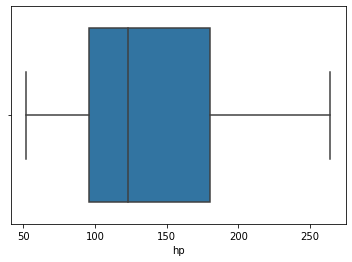

In [126]:
import seaborn as sns
sns.boxplot(data=df,x=df["hp"])

# Using Z score handling outliers

Z - score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.specifically, Z score tells how many standard deviations away a data point is from the mean.

A z-score equal to 1 represents an element that is 1 standard deviation greater than the mean

`Z score = (x -mean) / std. deviation`

Assume,

 - 99.7% of the data points lie between +/- 3

 - 68% of the data points lie between +/- 1 standard deviation.

 - 95% of the data points lie between +/- 2 standard deviation

 

![](https://media.geeksforgeeks.org/wp-content/uploads/20200428193707/image-111-1.png)


standard deviation and If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.

In [127]:
data = [1, 2, 2, 2, 3, 1, 1, 15, 2, 2, 2, 3, 1, 1, 2] 
mean = np.mean(data) 
std = np.std(data) 
print('mean of the dataset is : ', mean) 
print('')
print('std. deviation is : ', std)

mean of the dataset is :  2.6666666666666665

std. deviation is :  3.3598941782277745


In [128]:
threshold = 3

outlier = [] 

for i in data: 
    z = (i-mean)/std 
    if z > threshold: 
        outlier.append(i) 
print('outlier in dataset is : ', outlier) 

outlier in dataset is :  [15]


# Scaling and Normalization

**Scaling** means to transform your data so that it fits within a specific scale, such as 0–100 or 0–1. 

**Normalization** also rescales the values into a range of 0–1

If you use the age and the salary of a person in prediction, some algorithms will pay attention to the salary more because it is bigger, which does not make any sense.

In [129]:
from sklearn import preprocessing
import numpy as np

In [130]:
a = np.random.random((1, 4))
a = a*20
print("Data = ", a)

Data =  [[ 3.63053479  7.78258376  8.46080393 19.62881185]]


In [131]:
# normalize the data attributes

normalized = preprocessing.normalize(a)
print("Normalized Data = ", normalized)

Normalized Data =  [[0.15760747 0.33785474 0.36729739 0.85211894]]


### see sklearn.preprocessing.normalize [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html)

In [132]:
df4 = pd.read_csv('/content/drive/MyDrive/Tinkerhub/Data Cleaning/age.csv')
df4.head()

,id,Age
0,10236,766105
1,11993,288
2,9337,205
3,38189,88
4,35555,82


In [133]:
median = df4['Age'].median()
print("median of age is : ", median)
print("")
df4["Age"] = np.where(df4["Age"] > median, median, df4['Age'])
df4

median of age is :  78.5



,id,Age
0,10236,78.5
1,11993,78.5
2,9337,78.5
3,38189,78.5
4,35555,78.5
5,39443,75.0
6,10762,74.0
7,33847,72.0
8,21194,70.0
9,39450,70.0


https://numpy.org/doc/stable/reference/generated/numpy.where.html

In [151]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [136]:
np.where(a < 5, a, 10*a)

array([ 0,  1,  2,  3,  4, 50, 60, 70, 80, 90])